In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
Flights = pd.read_excel('flights.xlsx')

In [3]:
Airports = pd.read_csv('airports.dat', header = None)

In [4]:
Airports

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


In [5]:
Flights['Airline_sold'] = Flights['Airline']

In [6]:
def replace_airline(old_airline):
    if old_airline == 'United Express':
        return 'United Airlines'
    elif old_airline == 'Delta Connection':
        return 'Delta Air Lines'
    elif old_airline == 'American Eagle':
        return "American Airlines"
    elif old_airline == 'Alaska Horizon':
        return 'Alaska Airlines'
    elif old_airline == 'Air Canada Express':
        return 'Air Canada'
    elif old_airline == 'US Airways Express':
        return 'US Airways'
    else:
        return old_airline

In [7]:
for i, row in Flights.iterrows():
    temp = row['Airline'].split('\ndba ')
    if  len(temp) == 2:       
        Flights.set_value(i, 'Airline_sold', replace_airline(temp[1]))

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [8]:
Flights['Airline_sold']

0      China Eastern Airlines
1             Spring Airlines
2             Spring Airlines
3      China Eastern Airlines
4      China Eastern Airlines
5             Spring Airlines
6             Spring Airlines
7           Shandong Airlines
8           Shandong Airlines
9             Spring Airlines
10            Spring Airlines
11           Juneyao Airlines
12                  Dragonair
13                  Dragonair
14     China Eastern Airlines
15     Cathay Pacific Airways
16                  Dragonair
17          Emirates Airlines
18          Emirates Airlines
19          Emirates Airlines
20          Emirates Airlines
21            Spring Airlines
22     China Eastern Airlines
23           Juneyao Airlines
24     China Eastern Airlines
25                  Air China
26                  Air China
27          Shanghai Airlines
28            Spring Airlines
29          American Airlines
                ...          
167           United Airlines
168           United Airlines
169       

In [9]:
Flights['Aircraft_type'] = Flights['Aircraft Code']
Flights['Aircraft_type_detail'] = Flights['Aircraft Code']


In [10]:
def aircraft_type_processor(code):
    if code == 'A306':
        return "Airbus A300"
    elif code == 'A319' or code == 'A320' or code == 'A321' or code == 'A21N' or code == 'A20N':
        return "Airbus A320 family"
    elif code == 'A332' or code == 'A333':
        return "Airbus A330"
    elif code == 'A359':
        return "Airbus A350"
    elif code == 'A388':
        return "Airbus A380"
    elif code == 'B738' or code == 'B739' or code == 'B73E' or code == 'B737' or code == 'B38M':
        return "Boeing 737"
    elif code == "B744" or code == 'B748':
        return "Boeing 747"
    elif code == "B752" or code == 'B753':
        return "Boeing 757"
    elif code == 'B763' or code == 'B76W':
        return "Boeing 767"
    elif code == "B772" or code == 'B77L' or code == 'B773' or code == 'B77W':
        return "Boeing 777"
    elif code == "B788" or code == 'B789':
        return "Boeing 787"
    elif code == "MD88" or code == 'MD90' or code == 'B712':
        return "Boeing MD-80/90/717 Series"
    elif code == "E145" or code == 'E170' or code == 'E175' or code == 'E190':
        return "Embraer Regional Jets"
    elif code == "CRJ2" or code == 'CRJ7' or code == 'CRJ9':
        return "Canadair Regional Jets"
    elif code == "DH8D":
        return "Bombardier Dash-8"
    elif code == "AJ27":
        return "Comac ARJ-21"
    elif code == "C402":
        return "Cessna C402"

In [11]:
def aircraft_detail_processor(code):
    if code == 'A306':
        return "Airbus A300-600"
    elif code == 'A319':
        return "Airbus A319-100"
    elif code == 'A320':
        return "Airbus A320-200"
    elif code == 'A321':
        return "Airbus A321-200"
    elif code == 'A21N': 
        return "Airbus A321 NEO"
    elif code == 'A20N':
        return "Airbus A320 NEO"
    elif code == 'A332':
        return "Airbus A330-200"
    elif code == 'A333':
        return "Airbus A330-300"
    elif code == 'A359':
        return "Airbus A350-900"
    elif code == 'A388':
        return "Airbus A380-800"
    elif code == 'B712':
        return "Boeing 717-200"
    elif code == 'B737':
        return "Boeing 737-700"
    elif code == 'B738':
        return "Boeing 737-800"
    elif code == 'B739':
        return "Boeing 737-900"
    elif code == 'B73E':
        return "Boeing 737-900ER"
    elif code == 'B38M':
        return "Boeing 737 MAX 8"
    elif code == "B744":
        return "Boeing 747-400"
    elif code == 'B748':
        return "Boeing 747-8i"
    elif code == "B752":
        return "Boeing 757-200"
    elif code == 'B753':
        return "Boeing 757-300"
    elif code == 'B763':
        return "Boeing 767-300"
    elif code == 'B76W':
        return "Boeing 767-300ER"
    elif code == "B772":
        return "Boeing 777-200"
    elif code == "B77L":
        return "Boeing 777-200ER"
    elif code == 'B773':
        return "Boeing 777-300"
    elif code == 'B77W':
        return "Boeing 777-300ER"
    elif code == "B788":
        return "Boeing 787-8"
    elif code == 'B789':
        return "Boeing 787-9"
    elif code == "MD88":
        return "Boeing MD-88"
    elif code == 'MD90':
        return "Boeing MD-90"
    elif code == "E145":
        return "Embraer ERJ-145"
    elif code == 'E170':
        return "Embraer ERJ-170"
    elif code == 'E175':
        return "Embraer ERJ-175"
    elif code == 'E190':
        return "Embraer ERJ-190"
    elif code == "CRJ2":
        return "Canadair CRJ-200"
    elif code == 'CRJ7':
        return "Canadair CRJ-700"
    elif code == 'CRJ9':
        return "Canadair CRJ-900"
    elif code == "DH8D":
        return "Bombardier Dash-8 Q400"
    elif code == "AJ27":
        return "Comac ARJ-21-700"
    elif code == "C402":
        return "Cessna C402"

In [12]:
for i, row in Flights.iterrows():
        
    Flights.set_value(i, 'Aircraft_type', aircraft_type_processor(row['Aircraft_type']))
    Flights.set_value(i, 'Aircraft_type_detail', aircraft_detail_processor(row['Aircraft_type_detail']))

/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/home/shared/sp18-is590dv/conda_envs/is590dv-default/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [13]:
Flights

,Date,Flight No,Actual,Airline,Domestic/Int,Alliance,Country/Region,Departure City,Departure Airport,Depart Code,...,Aircraft,Aircraft Code,Reg No,Meal,Bag,Seq,FFP,Airline_sold,Aircraft_type,Aircraft_type_detail
0,2008.6.28,MU5664,MU5664,China Eastern Airlines,D,ST,China,Xiamen,Xiamen Gaoqi Int'l,XMN,...,MD-90-30,MD90,NaN,1,NaN,NaN,NaN,China Eastern Airlines,Boeing MD-80/90/717 Series,Boeing MD-90
1,2009.8.21,9C8839,9C8839,Spring Airlines,D,NaN,China,Shanghai,Shanghai Pudong Int'l,PVG,...,A320-214,A320,NaN,0,NaN,NaN,NaN,Spring Airlines,Airbus A320 family,Airbus A320-200
2,2009.8.28,9C8810,9C8810,Spring Airlines,D,NaN,China,Changchun,Changchun Longjia Int'l,CGQ,...,A320-214,A320,NaN,0,NaN,NaN,NaN,Spring Airlines,Airbus A320 family,Airbus A320-200
3,2010.2.2,MU515,MU515,China Eastern Airlines,I,ST,China,Shanghai,Shanghai Pudong Int'l,PVG,...,A300B4-605R,A306,NaN,1,NaN,NaN,NaN,China Eastern Airlines,Airbus A300,Airbus A300-600
4,2010.2.6,MU518,MU518,China Eastern Airlines,I,ST,China,Fukuoka,Fukuoka Int'l,FUK,...,737-89PWL,B738,B-5472,1,NaN,NaN,NaN,China Eastern Airlines,Boeing 737,Boeing 737-800
5,2010.8.16,9C8839,9C8839,Spring Airlines,D,NaN,China,Shanghai,Shanghai Pudong Int'l,PVG,...,A320-214,A320,B-6380,0,NaN,NaN,NaN,Spring Airlines,Airbus A320 family,Airbus A320-200
6,2010.8.24,9C8810,9C8810,Spring Airlines,D,NaN,China,Changchun,Changchun Longjia Int'l,CGQ,...,A320-214,A320,NaN,0,NaN,NaN,NaN,Spring Airlines,Airbus A320 family,Airbus A320-200
7,2011.8.12,SC4864,SC4864,Shandong Airlines,D,NaN,China,Shanghai,Shanghai Pudong Int'l,PVG,...,737-85NWL,B738,B-5352,0,NaN,NaN,NaN,Shandong Airlines,Boeing 737,Boeing 737-800
8,2011.8.14,SC4863,SC4863,Shandong Airlines,D,NaN,China,Yantai,Yantai Laishan,YNT,...,737-85NWL,B738,B-5352,1,NaN,NaN,NaN,Shandong Airlines,Boeing 737,Boeing 737-800
9,2011.8.18,9C8839,9C8839,Spring Airlines,D,NaN,China,Shanghai,Shanghai Pudong Int'l,PVG,...,A320-214,A320,B-6707,0,NaN,NaN,NaN,Spring Airlines,Airbus A320 family,Airbus A320-200


In [14]:
Aircraft_type = Flights.groupby('Aircraft_type')['Flight No'].count().sort_values(ascending = False)

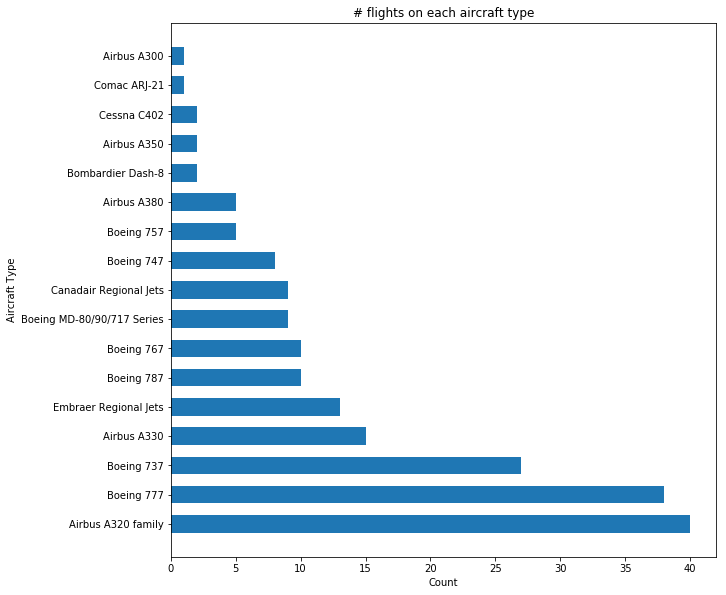

In [15]:
plt.figure(figsize=(10,8))
plt.barh(y = Aircraft_type.index, width = Aircraft_type, height = 0.6)
plt.tight_layout()
plt.xlabel('Count')
plt.ylabel('Aircraft Type')
plt.title('# flights on each aircraft type')
plt.show()

In [16]:
Aircraft_detail = Flights.groupby('Aircraft_type_detail')['Flight No'].count().sort_values(ascending = False)

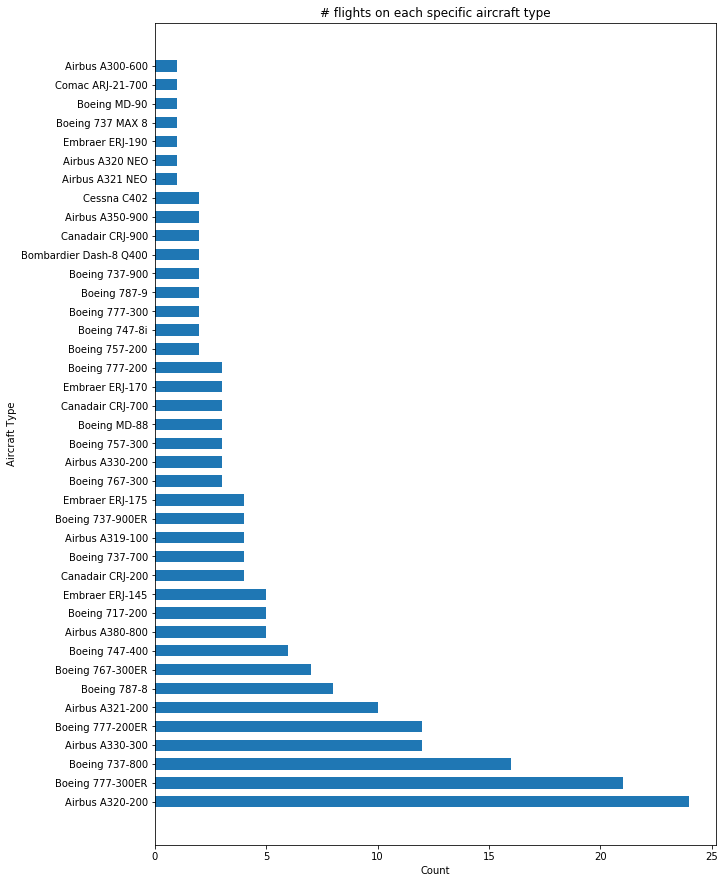

In [17]:
plt.figure(figsize=(10,12))
plt.barh(y = Aircraft_detail.index, width = Aircraft_detail, height = 0.6)
plt.tight_layout()
plt.xlabel('Count')
plt.ylabel('Aircraft Type')
plt.title('# flights on each specific aircraft type')
plt.show()